<link rel="stylesheet" href="estilo.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Fundamentos Estatísticos e Visualização de Dados
    
---

# Conteúdo

Pré-processamento de dados quantiativos e qualitativos

- Fundamentos Estatísticos
    - Análise univariada
    - Análise bivariada
    - Analise multivariada
- Visualização de Dados    

# Fundamentos Estatísticos

- A Estatística é uma disciplina muito importante na área de mineração de dados.

- A Estatística é utilizada em várias etapas do processo de KDD:
    - Pré-processamento: ex. descrever e entender a distribuição de cada variável, criar novas variáveis, normalizar, discretizar, imputar valores desconhecidos.
    - Mineração de Dados: ex. ajustar modelos preditivos aos dados, selecionar modelos.
    - Pós-processamento: ex. avaliar a qualidade dos modelos preditivos, calcular sensibilidade, especificidade, precision, recall, correlação.
    
- Nesta aula vamos lembrar os conceitos de estatística e combinar com a visualização de dados, a qual nos ajuda a entender melhor o que significam essas medidas estatísticas calculadas.

## População, amostra e variáveis

- **População**: é a coleção completa dos elementos a serem estudados. Por exemplo, conjunto de dados sobre todas as cidades de Santa Catarina.
- **Amostra**: é um subconjunto dos elementos extraído da população. Por exemplo, escolher uma amostra aleatória de cidades de Santa Catarina.
- **Variável**: é cada *atributo* ou *característica* que descreve uma população e, consquentemente, está presente em uma amostra da população.
- **Tipos de Variáveis** em Estatística:
    - Qualitativa (não numérica):
        - Nominal, com nomes, rótulos ou categorias
        - Ordinal, com valores que podem ser ordenados
    - Quantitativa (numérica): representam contagens e medições
        - Contínua, com número infinito de possíveis valores
        - Discreta, com número finito ou contável de valores

## Variável Aleatória

- Uma variável aleatória $X$ é aquela que admite um único valor numérico para cada execução de experimento. E para cada valor possível dessa variável existe uma probabilidade associada.

- Essa definição vale tanto variáveis aleatórias *discretas* e *contínuas*. Nas *discretas* o número de possíveis valores é finito ou contável e nas *contínuas* o número de possíveis valores é infinito.

- Distribuições de probabilidade:

A *probabilidade* diz respeito à frequência *relativa* da ocorrência de um dado ou evento. Em outras palavras é o número de vezes que esse dado ou evento ocorreu em relação ao número total de eventos. Por exemplo, ao estudar as condições climáticas diárias na cidade de Lages nos últimos 10 (dez) dias, verificamos que em 3 (três) dias choveu. Assim, a *probabilidade* do evento `chuva` nesse conjunto de dados é de $\frac{3}{10}=0.3=30\%$.

A *distribuição de probabilidade* especifica uma probabilidade para cada possível valor (dado ou evento) da variável. Por exemplo, se nesses mesmos 10 dias, em 3 houve chuva, em 5 houve sol e em 2 houve nuvens, temos a seguinte distribuição de probabilidades:
    
$$
\begin{eqnarray}
P(X=chuva) = \frac{3}{10}=0.3=30\% \\
P(X=sol) = \frac{5}{10}=0.5=50\% \\
P(X=nuvens) = \frac{2}{10}=0.2=20\% \\
\end{eqnarray}
$$

Nessa distribuição a soma das probabilidades do eventos acontecerem tem que resultar em $1 = 100\%$, como segue:    
$$    
P(X=chuva) + P(X=sol) + P(X=nuvens) = \frac{3}{10} + \frac{5}{10} + \frac{2}{10} = 1 \\    
$$    

Assim como a probabilidade de qualquer um dos eventos acontecerem, que também será $1 = 100\%$, como segue:
$$
P(X=chuva \cup X=sol \cup X=nuvens) = \frac{10}{10} = 1 \\
$$    

As distribuições de probabilidade mais comuns encontradas em conjuntos de dados são:
- Distribuição uniforme
- Distribuição normal
- Distribuição Poisson

### Distribuição uniforme

A distribuição de uma variável é uniforme se a probabilidade de qualquer valor ocorrer é a mesma. Para uma variável $X$ com $k$ possíveis valores $x_1, x_2, ..., x_k$ a probabilidade de um valor $x_i$ ocorrer é $P(X=x_i)=\frac{1}{k}$.

Neste exemplo vamos considerar $n$ valores inteiros de $0$ a $k-1$ distribuídos de acordo com uma distribuição uniforme.

In [1]:
import numpy as np
k = 10
n = 10**6
np.random.seed(1)
X = np.random.randint(0,k,n)

In [2]:
from collections import Counter
import pandas as pd
labels, frequency = zip(*sorted(Counter(X).items()))
print('Possíveis valores de X', labels)
print('Frequência: ', frequency)

Possíveis valores de X (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Frequência:  (100094, 99413, 100108, 100175, 100294, 100042, 99842, 100085, 99611, 100336)


**Visualização do Gráfico da Distribuição de Frequência da Variável**

<BarContainer object of 10 artists>

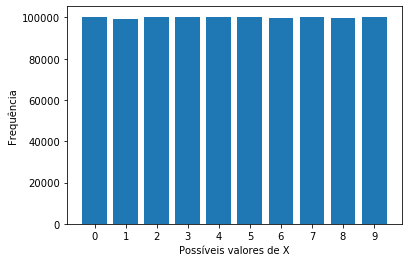

In [5]:
import matplotlib.pyplot as plt
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência')
plt.xticks(labels)
plt.bar(labels, frequency)

**Visualização do Gráfico da Distribuição de Frequência Relativa da Variável**

<BarContainer object of 10 artists>

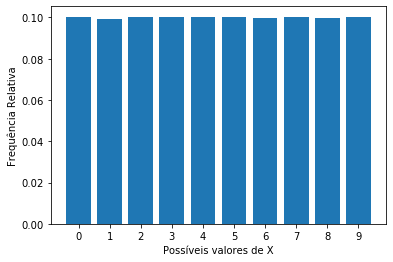

In [6]:
rel_frequency = np.array(frequency) / sum(frequency)
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
plt.xticks(labels)
plt.bar(labels, rel_frequency)

**Visualização do Gráfico da Distribuição de Frequência Relativa Acumulada da Variável**

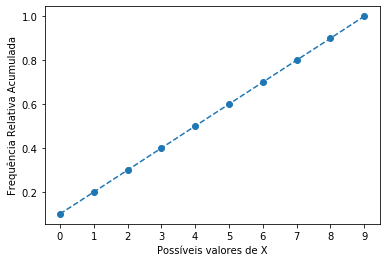

In [7]:
rel_frequency = np.array(frequency) / sum(frequency)
cumsum_rel_frequency = np.cumsum(rel_frequency)
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa Acumulada')
plt.xticks(labels)
plt.plot(labels, cumsum_rel_frequency, "o--")

### Distribuição normal

Esta distribuição é uma das mais comuns na natureza e também em conjuntos de dados na prática. Quando uma variável está distribuída normalmente é possível estimar a probabilidade de um valor $x$ ocorrer utilizando a média e o desvio padrão.

A função de distribuição normal de uma variável aleatória é dada por:

$$
f(x,\mu,\sigma) = \frac{e^{-\frac{(x-\mu)^2}{2\sigma^2}}}{\sigma\sqrt{2\pi}}
$$

Um ponto relevante dessa função é que a probabilidade do valor $x$ depende do valores de média $\mu$ e desvio-padrão $\sigma$ da variável $X$.

**Gráfico da Distribuição Normal**:

<img src="img/distribuicao_normal.jpg" width="40%">

Observamos que aproximadamente:
- $68.27%$ dos valores estão a uma distância de 1 desvio-padrão em relação à média.
- $98.45%$ dos valores estão a uma distância de 2 desvio-padrão em relação à média.
- $99.73%$ dos valores estão a uma distância de 3 desvio-padrão em relação à média.

A seguir definimos uma amostra de uma variável contínua com média $\mu=5$ e desvio padrão $\sigma=2$.

In [9]:
import numpy as np
mean = 5
sd = 2
n = 10**6
np.random.seed(1)
X = np.random.normal(mean, sd,n)
X

array([8.24869073, 3.77648717, 3.9436565 , ..., 3.8076781 , 7.37207976,
       5.62679603])

**Visualização do Gráfico da Distribuição de Frequência Relativa da Variável**

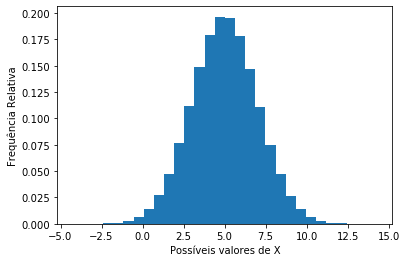

In [10]:
bins = 30
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
count, bins, ignored = plt.hist(X, bins=bins, density=True)
plt.show()

**Visualização do Gráfico da Distribuição de Frequência Relativa Acumulada da Variável**

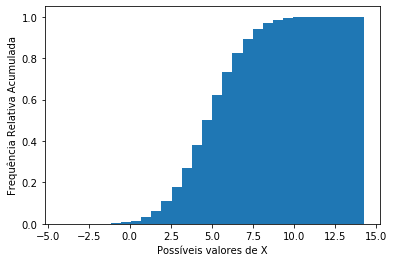

In [11]:
bins = 30
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa Acumulada')
count, bins, ignored = plt.hist(X, bins=bins, density=True, cumulative=True)
plt.show()

### Distribuição Poisson

Consiste em uma distribuição de probabilidade de variável aleatória discreta que expressa a probabilidade de uma série de eventos ocorrer em um certo período de tempo, dado que a série de eventos são independentes entre sí. 

A função de probabilidade desta distribuição é dada por:

$$
f(k,\lambda )=\frac {e^{-\lambda }\lambda ^{k}}{k!}
$$

O valor de $\lambda$ é o número esperado de ocorrências que ocorrem num dado intervalo de tempo. E o valor de $k$ é o número de ocorrências que queremos verificar a probabilidade de acontecer.

Com isso, a probabilidade de que existam exatamente $k$ ocorrências (k sendo um inteiro não negativo, k = 0, 1, 2, ...) é dada por $f(k,\lambda)$

Por ex., se uma loja vende em média um produto a cada 3 minutos e estamos interessados em saber quantos produtos a loja vende em 15 minutos, $\lambda = \frac{15}{3} = 5$.

In [14]:
import numpy as np
lambda_ = 5
sd = 2
n = 10**6
np.random.seed(1)
X = np.random.poisson(lambda_, n)
X

array([2, 2, 4, ..., 7, 7, 2])

**Visualização do Gráfico da Distribuição de Frequência Relativa da Variável**

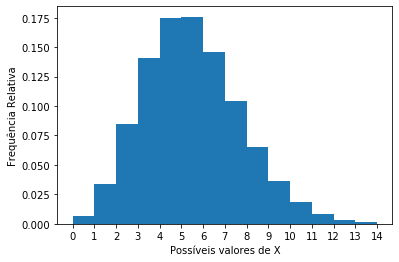

In [15]:
bins = 15
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
plt.xticks(range(0,bins))
count, bins, ignored = plt.hist(X, bins=range(0,bins), density=True)
plt.show()

**Visualização do Gráfico da Distribuição de Frequência Relativa Acumulada da Variável**

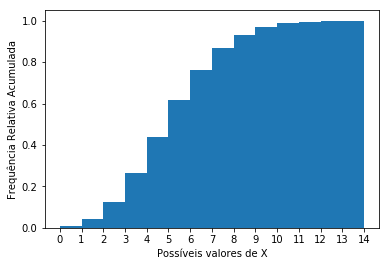

In [114]:
bins = 15
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa Acumulada')
plt.xticks(range(0,bins))
count, bins, ignored = plt.hist(X, bins=range(0,bins), density=True, cumulative=True)
plt.show()

### Medidas Resumo

- Medidas de Tendência Central
- Medidas de Dispersão
- Medidas de Forma

### Medidas de Tendência Central

- **Média**: este é o valor esperado de uma variável $X$, definido por $\mu$. Em geral é calculada pela soma dos valores da variável numérica, dividido pelo número total de valores da variável.

- **Mediana**: este é o valor central que separa a distribuição em duas metades. Para calcular a mediana os valores da variável são primeiramente ordenados e, se o número de valores é ímpar a mediana será o valor central, e se o número de valores é par a mediana será a média aritmética dos dois valores dentrais.

- **Moda**: este é o valor mais frequente de uma variável.

### Medidas de Dispersão

- **Variância**: mede a dispersão dos valores de uma variável. É sempre não negativa. Uma variância pequena indica que os valores estão próximos à média e, o contrário, que estão distântes em relação à média. A variância é calculada pela média dos quadrados das distâncias dos valores em relação à média, como segue:

$$
var(X) = \frac{1}{N} = \sum_{i}^{N} (x_i - \mu)
$$

- **Desvio-padrão**: é a raiz quadrada da variância. Esta medida é relevante como uma medida de dispersão de referência em relação à média. Um ponto importante é que ela tem a mesma unidade que a média. Por ex, se nossa variável é em metros $m$, a nossa média será em $m$, a variância em $m^2$ e o desvio-padrão em $m$.

$$
\sigma(X) = \sqrt{var(X)}
$$

- **Coeficiente de Variação**: consiste na relação do desvio-padrão e a média. Essa medida permite saber quanto representa o desvio-padrão em relação à média. Por ex., se uma distribuição tem média $\mu=10$ e $\sigma=2$, o desvio-padrão representa $20\%$ da média.

### Medidas de Forma

- **Assimetria**: ou *skewness* mede a assimatria da função de distribuição em torno da média. Quando a assimetria é negativa, a distribuição tende à direita, e quando a assimetria é positiva, a distribuição tende à esquerda. 

$$
\gamma(X) = \frac{1}{N} \sum_{i}^{N} \bigg[\frac{(x_i - \mu)}{\sigma}\bigg]^3
$$

- **Curtose**: ou *kurtosis* é a medida de forma que caracteriza o pico ou achatamento da função de distribuição de uma variável. Se a curtose é positiva então o pico da função é mais afunilado, se a curtose é negativa então o pico da função é mais achatado.

$$
\beta(X) = \frac{1}{N} \sum_{i}^{N} \bigg[\frac{(x_i - \mu)}{\sigma}\bigg]^4
$$

**Exemplo de Assimetria Positiva (à esquerda)**

In [20]:
from scipy.stats import skew
mean = 20
sd = 2
n = 10**6
np.random.seed(1)
X = np.random.normal(mean, sd,n) ** 4
print('skewness', skew(X))

skewness 0.8972842641338391


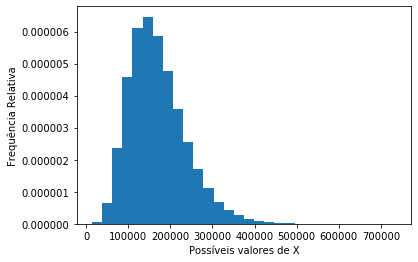

In [21]:
bins = 30
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
count, bins, ignored = plt.hist(X, bins=bins, density=True)
plt.show()

**Exemplo de Curtose Negativa (achatada)**

In [22]:
from scipy.stats import kurtosis
mean = 8
sd = 2
n = 10**6
np.random.seed(1)
X = np.random.normal(mean, sd,n) * np.random.uniform(-mean, mean,n)
print('curtosis', kurtosis(X))

curtosis -0.7916954454117038


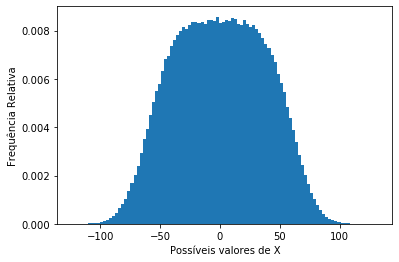

In [23]:
bins = 100
plt.xlabel('Possíveis valores de X')
plt.ylabel('Frequência Relativa')
count, bins, ignored = plt.hist(X, bins=bins, density=True)
plt.show()

### Medidas de Associação (Análise de duas variáveis)

Para duas variáveis aleatórias distintas é possível calcular a dependência entre elas usando-se uma medida de associação. As medidas mais comuns são:
- Covariância
- Correlação
- Coeficiente de Determinação

- *Covariância*: a covariação é uma medida de associação que mede se duas variáveis $X$ e $Y$ desviam de suas médias de maneira similar. Se variarem de maneira similar, elas são covariantes, e existe uma relação estatística entre suas flutuações.

    - Dadas duas variáveis $X$ e $Y$ amostradas em pares $(x_i,y_i), i = 1, 2, ..., N$, a covariância $cov(X,Y)$ é dada por:
    
    $$
    cov(X,Y) = \frac{1}{N} \sum_{i=1}^N (x_i-\mu_X)\;(y_i-\mu_Y)
    $$

    - Se geralmente valores $X$ que estiverem abaixo da média implicam em valores de $Y$ abaixo da média, o produto de ambos será positivo. Da mesma forma que se valores de $X$ que estiverem axima da média implicam em valores de $Y$ axima da média.
    - Já, se valores de $X$ que estiverem abaixo da média implicam em valores de $Y$ acima da média, o produto de ambos será um valor negativo.
    - E as diferenças forem grandes os produtos retornarão valores altos, caso contrário, valores baixos, indicando pouca covariação.
    - Observe que esta medida não está na unidade de $X$ já que as diferenças foram elevadas ao quadrado. Por ex. se a unidade da variável é em metros $m$ então esta medida está em $m^2$.

- *Correlação* (Pearson): a correlação de Pearson mede a dependência linear entra duas variáveis aleatórias $X$ e $Y$. A partir do cálculo da covariância é utilizado um fator de escala baseado no desvio-padrão de cada uma das variáveis. Dessa forma, a medida de associação de variáveis fica sem unidade e com valor entre $-1$ e $1$. 

    - Uma correlação negativa indica que à medida que o valor da variável aumenta o valor da outra variável diminui. 
    
    - Uma correlação positiva indicia que à medida que o valor de uma variável aumenta a outra também aumenta.

    - Dadas duas variáveis $X$ e $Y$ amostradas em pares $(x_i,y_i), i = 1, 2, ..., N$, a covariância $cov(X,Y)$ é dada por:
    
    $$
    \rho(X,Y) = \frac{ cov(X,Y) } {\sigma(X)\;\sigma(Y)}
    $$
   
    - Observe que esta medida não tem unidade, pois o numerador está na mesma unidade que o denominador. Se a covariância está em $m^2$ e o desvio-padrão de cada variável em $m$, o resultado será apenas uma razão.

- *Coeficiente de Determinação*: este coeficiente normaliza a correlação entra as variáveis no intervalo $[0,1]$, abstraindo se a correlação é positiva ou negativa. No coeficiente de determinação estamos apenas interessados em saber a dependência entre as variáveis. Seja $\rho$ o coeficiente de correlação entre as variáveis $X$ e $Y$, o coeficiente de determinação, também chamado de $R^2$, é calculado pelo quadrado do coeficente de correlação, $\rho^2$.